# Derivación numérica

Una de las formas más rápidas y efectivas para encontrar los bordes en una imagen es calcular su derivada, debido a que aplicando este operador no es necesario hacer transformaciones previas.


Para una funcion usar delta X <= 0.01

Para una tabla depende de los datos

** Actividad 1**

Encuentra (a mano) la fórmula para las diferencias centradas de primer orden utilizando un polinomio de Lagrange de grado 2. Para ello sigue los siguientes pasos.

1. Encuentra un polinomio de Lagrange de grado 2.
2. Cambia las restas en el denominador de las fracciones del polinomio por los $\Delta_x$ respectivos.
3. Cambia $x$ por $x_1$.
4. Determina la fórmula de las derivadas centradas

#escribe aquí la fórmula que encontraste en la actividad 1

** Actividad 2**

Encuentra e implementa una estrategia para encontrar los bordes de una imagen utilizando la derivación numérica vista en clase (debes implementar las diferencias regresivas, progresivas o centradas según sea el caso, por tanto no se debe utilizar la función que trae definido python para derivar). Recuerda que en los extremos de la imagen se deben utilizar diferencias regresivas o progresivas. Compara los resultados con las imágenes obtenidas con la detección de cruces por cero. ¿Qué técnica funciona mejor?

In [1]:
#from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import numpy as np
import cv2 as cv

In [2]:
imagen = cv.imread('supercow.jpg')
np.shape(imagen)

(786, 1017, 3)

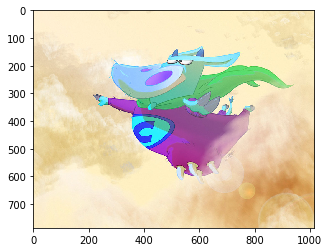

In [3]:
#imagen = plt.imread('supercow.png')
plt.imshow(imagen)
plt.show()

In [4]:
B = imagen[:, :, 0]
G = imagen[:, :, 1]
R = imagen[:, :, 2]

In [5]:
R_limpia = np.zeros(np.shape(R))
B_limpia = np.zeros(np.shape(B))
G_limpia = np.zeros(np.shape(G))

In [6]:
def derivar_centrada(indice, delta, vector):
    return int(round((vector[int(indice + (delta/2))] - vector[int(indice - (delta/2))])/delta))

In [7]:
def derivar_progresiva(indice, delta, vector):
    return int(round((vector[indice + delta] - vector[indice])/delta))

In [8]:
def derivar_regresiva(indice, delta, vector):
    return int(round((vector[indice] - vector[indice - delta])/delta))

In [9]:
def derivar(canal, limpio):
    for row in range(np.shape(canal)[0]):
        for column in range(np.shape(canal)[1]):
            if column == 0:
                limpio[row][column] = derivar_progresiva(column, 1, canal[row])
            elif column == (len(canal[row]) - 1):
                limpio[row][column] = derivar_regresiva(column, 1, canal[row])
            else:
                limpio[row][column] = derivar_centrada(column, 2, canal[row])

In [10]:
derivar(B, B_limpia)
derivar(G, G_limpia)
derivar(R, R_limpia)

c:\users\alexi\envs\metodos\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in ubyte_scalars
  


In [11]:
zipped = np.dstack((R_limpia, G_limpia, B_limpia))
cv.namedWindow('imagen', cv.WINDOW_NORMAL) #para redimensionar la ventana manualmente
cv.imshow('imagen',zipped) #mostramos la imagen
cv.waitKey(0) # es una función de enlace de teclado. El argumento es el tiempo
# en ms. La función espera n ms para cualquier evento del teclado. En 
# ese caso el codigo seguirá. Si se pasa un 0 se espera indeterminadamente
cv.destroyAllWindows()  #cierra las ventanas abiertas

In [12]:
np.where(zipped < 0)

(array([], dtype=int32), array([], dtype=int32), array([], dtype=int32))